# Tracking the Growth of COVID-19 Cases

The purpose of this notebook is to display the 7 day rolling average of confirmed cases of COVID-19 in various locations in the US.

**The notebook pulls data from the Johns Hopkins [Data Repository](https://github.com/CSSEGISandData/COVID-19) of global Coronavirus COVID-19 cases**, and then does the following things:

- Gives the data in a series of grid views (Country, State, County)
- Gives the data in a series of charts (scroll to bottom)


## Important Caveats:

- The confirmed cases are not the number of infections in each country, only those that have tested positive.


In [1]:
# **** NOTE: THIS RUNS ON PYTHON 3.7 ****
%run covid_base.py "California" "Los Angeles"

Today's date: 2020-10-22 17:00:11.072554


## Global COVID-19 Analysis

In [2]:
principality = 'Country/Region'
cases, ds = get_cases_ds(principality, dfGlobalConfirmed, dfGlobalDeaths)

casessummary, mostrecentdatecases = get_cases_summary(principality, dfGlobalConfirmed, dfGlobalDeaths)
print('\nTotal number of cases as of', mostrecentdatecases)
casessummary


Total number of cases as of 10/21/20


,10/21/20 cases,Deaths,Death_rate_pct
Country/Region,,,
US,8336031,222176,2.67
Brazil,5298772,155403,2.93
India,7706946,116616,1.51
Mexico,867559,87415,10.08
United Kingdom,792194,44248,5.59
Italy,449648,36832,8.19
Spain,1005295,34366,3.42


## COVID-19 Country-by-Country Format for Further Analysis

In [3]:
casegrouped = cases.groupby(principality).sum().reset_index()
mc = melt_dataframes_date(casegrouped, principality, caseName)

dsgrouped = ds.groupby(principality).sum().reset_index()
md = melt_dataframes_date(dsgrouped, principality, dName)

countryData = get_joined_melted_cases_deaths(mc, md, principality)

print('\nNumber of confirmed US cases as of', mostrecentdatecases)
#print('\nNote: if the number of current deaths (high and close) are 0, the dates here will not display')

countryDataTA = dfLocale(countryData, principality, localeName='US')
countryDataTA.sort_values(by='date', ascending=False)[:7]


Number of confirmed US cases as of 10/21/20


,Country/Region,Cases,date,Deaths,DeathsDiff,CaseDiff,Rolling7Average
47673,US,8212981,2020-10-19,220119.0,445.0,58387.0,58397.428571
47672,US,8154594,2020-10-18,219674.0,388.0,48210.0,56006.857143
47671,US,8106384,2020-10-17,219286.0,711.0,57519.0,55493.142857
47670,US,8048865,2020-10-16,218575.0,883.0,69156.0,55081.714286
47669,US,7979709,2020-10-15,217692.0,820.0,63610.0,53405.142857
47668,US,7916099,2020-10-14,216872.0,985.0,59494.0,52345.285714
47667,US,7856605,2020-10-13,215887.0,802.0,52406.0,51037.714286


## US State-by-State COVID-19 Analysis

In [4]:
principality = 'Province_State'
uscases, usds = get_cases_ds(principality, dfUSConfirmed, dfUSDeaths)

casessummary, mostrecentdatecases = get_cases_summary(principality, uscases, usds)
print('\nTotal number of cases as of', mostrecentdatecases)
casessummary


Total number of cases as of 10/21/20


,10/21/20 cases,Deaths,Death_rate_pct
Province_State,,,
New York,488506,33371.0,6.83
Texas,868981,17652.0,2.03
California,886939,17167.0,1.94
New Jersey,223223,16245.0,7.28
Florida,762533,16210.0,2.13
Massachusetts,146166,9780.0,6.69
Illinois,358799,9605.0,2.68


## COVID-19 State-by-State Format for Further Analysis

In [5]:
uscasegrouped = uscases.groupby(principality).sum().reset_index()
mc = melt_dataframes_date(uscasegrouped, principality, caseName)

usdsgrouped = usds.groupby(principality).sum().reset_index()
md = melt_dataframes_date(usdsgrouped, principality, dName)

stateData = get_joined_melted_cases_deaths(mc, md, principality)

print('\nNumber of confirmed ' + home_state + ' COVID-19 cases and deaths by county as of', mostrecentdatecases)

#stateData
stateDataTA = dfLocale(stateData, principality, localeName=home_state)
stateDataTA.sort_values(by='date', ascending=False)[:7]


Number of confirmed California COVID-19 cases and deaths by county as of 10/21/20


,Province_State,Cases,date,Deaths,DeathsDiff,CaseDiff,Rolling7Average
1641,California,879645,2020-10-19,16982.0,3.0,3953.0,3104.571429
1640,California,875692,2020-10-18,16979.0,23.0,2078.0,2928.857143
1639,California,873614,2020-10-17,16956.0,46.0,2361.0,3029.142857
1638,California,871253,2020-10-16,16910.0,78.0,3105.0,3168.142857
1637,California,868148,2020-10-15,16832.0,103.0,2944.0,3268.285714
1636,California,865204,2020-10-14,16729.0,85.0,3894.0,3325.142857
1635,California,861310,2020-10-13,16644.0,58.0,3397.0,3301.142857


## County-by-County COVID-19 Analysis 

In [6]:
principality = 'County'
stateCases, stateDs = get_cases_ds(principality, dfUSConfirmed, dfUSDeaths)

casessummary, mostrecentdatecases = get_cases_summary(principality, stateCases, stateDs)
print('\nNumber of confirmed ' + home_state + ' cases as of', mostrecentdatecases)
casessummary



Number of confirmed California cases as of 10/21/20


,10/21/20 cases,Deaths,Death_rate_pct
County,,,
Los Angeles,290486,6944.0,2.39
Orange,57635,1423.0,2.47
Riverside,65056,1275.0,1.96
San Bernardino,60945,1065.0,1.75
San Diego,53263,863.0,1.62
San Joaquin,21436,484.0,2.26
Sacramento,24811,474.0,1.91


## COVID-19 County-by-County Format for Further Analysis

In [7]:
mc = melt_dataframes_date(stateCases, principality, caseName)
md = melt_dataframes_date(stateDs, principality, dName)

countyData = get_joined_melted_cases_deaths(mc, md, principality)

print('\nNumber of confirmed ' + home_state + ' cases by county as of', mostrecentdatecases)
#print('\nNote: if the number of current deaths (high and close) are 0, the dates here will not display')

countyData
countyDataTA = dfLocale(countyData, principality, localeName=home_county)
countyDataTA.sort_values(by='date', ascending=False)[:11]


Number of confirmed California cases by county as of 10/21/20


,County,Cases,date,Deaths,DeathsDiff,CaseDiff,Rolling7Average
5203,Los Angeles,289366,2020-10-19,6877.0,1.0,915.0,912.000000
5202,Los Angeles,288451,2020-10-18,6876.0,13.0,315.0,902.285714
5201,Los Angeles,288136,2020-10-17,6863.0,8.0,914.0,995.857143
5200,Los Angeles,287222,2020-10-16,6855.0,21.0,1039.0,1044.714286
5199,Los Angeles,286183,2020-10-15,6834.0,22.0,1167.0,1074.000000
5198,Los Angeles,285016,2020-10-14,6812.0,22.0,1266.0,1081.571429
5197,Los Angeles,283750,2020-10-13,6790.0,17.0,768.0,1127.714286
5196,Los Angeles,282982,2020-10-12,6773.0,2.0,847.0,1148.571429
5195,Los Angeles,282135,2020-10-11,6771.0,3.0,970.0,1081.428571
5194,Los Angeles,281165,2020-10-10,6768.0,27.0,1256.0,1075.285714



7 day new US cases as of 10/21/20


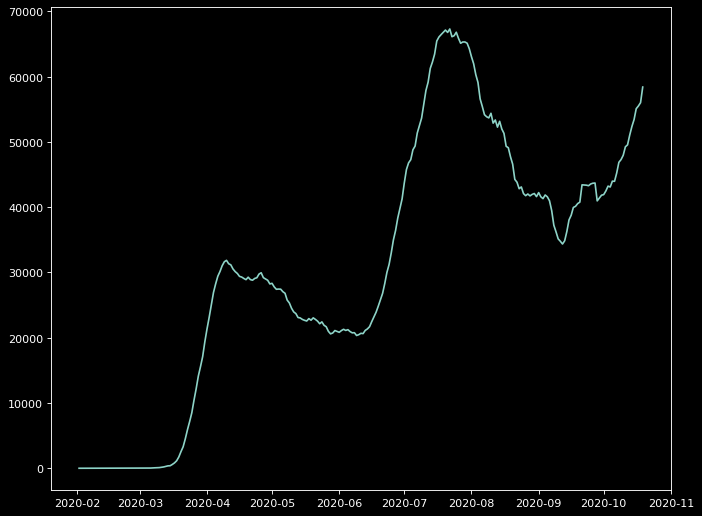

In [8]:
print('\n7 day new US cases as of', mostrecentdatecases)

countryDataTA.index = countryDataTA["date"]
with plt.style.context('dark_background'):
    plt.figure(num=None, figsize=(10, 8), dpi=80)
    plt.plot(countryDataTA["Rolling7Average"])
plt.show()



7 day average new California cases as of 10/21/20


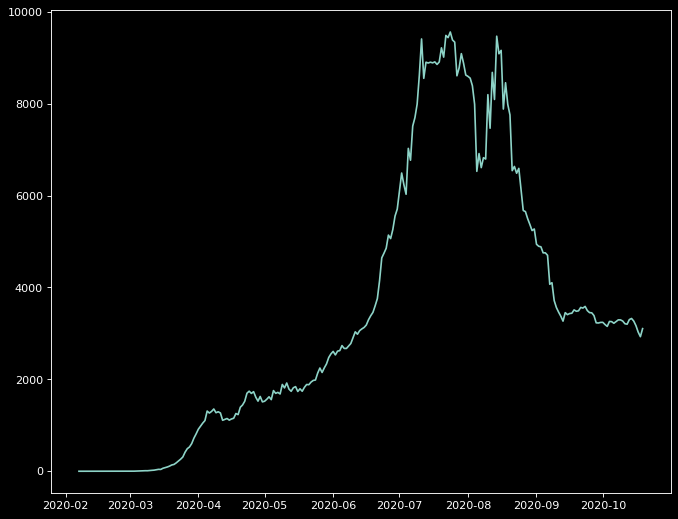

In [9]:
print('\n7 day average new ' + home_state + ' cases as of', mostrecentdatecases)

stateDataTA.index = stateDataTA["date"]
with plt.style.context('dark_background'):
    plt.figure(num=None, figsize=(10, 8), dpi=80)
    plt.plot(stateDataTA["Rolling7Average"])
plt.show()



7 day average new Los Angeles cases as of 10/21/20


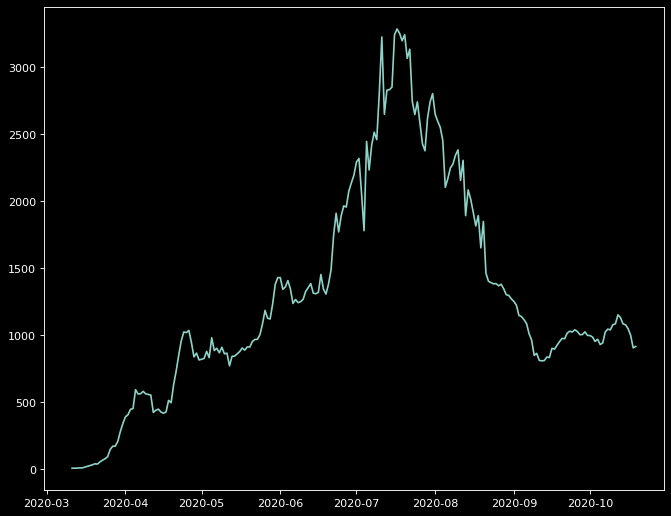

In [10]:
print('\n7 day average new ' + home_county + ' cases as of', mostrecentdatecases)

countyDataTA.index = countyDataTA["date"]
with plt.style.context('dark_background'):
    plt.figure(num=None, figsize=(10, 8), dpi=80)
    plt.plot(countyDataTA["Rolling7Average"])
plt.show()